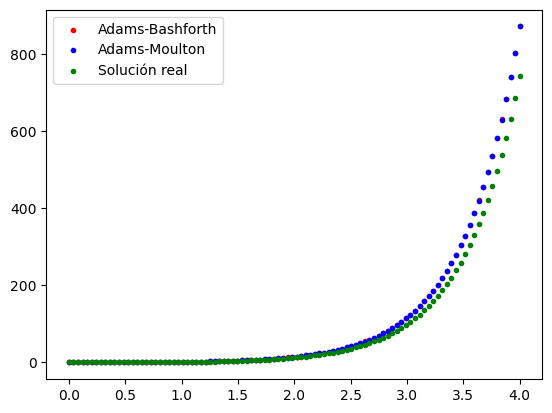

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def System(x, t): 
    dxdt = t + (2 * x)
    return dxdt
def SolucionCorrecta(t):
    return ((-t/2)-(1-(np.e**(2*t)))/4)

def Rungekutta(f, r0, t, grado=4):
    h = t[1] - t[0]
    x = np.zeros_like(t)
    x[0] = r0
    
    if grado != 0:
        for i in range(1, grado):
            R = x[i-1]
            K1 = f(R, t[i-1])
            R = x[i-1] + 0.5 * h * K1
            K2 = f(R, t[i-1] + 0.5 * h)
            R = x[i-1] + 0.5 * h * K2
            K3 = f(R, t[i-1] + 0.5 * h)
            R = x[i-1] + h * K3
            K4 = f(R, t[i-1] + h)
            x[i] = x[i-1] + (h * (K1 + 2 * K2 + 2 * K3 + K4)) / 6
    else:
        for i in range(1, len(t)):
            a = x[i-1]
            R = a
            K1 = f(R, t[i-1])
            R = a + 0.5 * h * K1
            K2 = f(R, t[i-1] + 0.5 * h)
            R = a + 0.5 * h * K2
            K3 = f(R, t[i-1] + 0.5 * h)
            R = a + h * K3
            K4 = f(R, t[i-1] + h)
            x[i] = x[i-1] + (h * (K1 + 2 * K2 + 2 * K3 + K4)) / 6
    return x

def adamsmethod(f, r0, t, grado=4):
    x = Rungekutta(f, r0, t, grado=4)
    h = t[1] - t[0]
    x_bash = x.copy()
    x_mul = x.copy()
    
    for i in range(grado, len(t)):
        f1_b = 1901 * f(x_bash[i-1], t[i-1])
        f2_b = -2774 * f(x_bash[i-2], t[i-2])
        f3_b = 2616 * f(x_bash[i-3], t[i-3])
        f4_b = -1274 * f(x_bash[i-4], t[i-4])
        f5_b = 251 * f(x_bash[i-5], t[i-5])
        summ = f1_b + f2_b + f3_b + f4_b + f5_b
        x_bash[i] = x_bash[i-1] + (h / 720) * summ
        
        f1_m = 475 * f(x_bash[i], t[i])
        f2_m = 1427 * f(x_bash[i-1], t[i-1])
        f3_m = -798 * f(x_bash[i-2], t[i-2])
        f4_m = 482 * f(x_bash[i-3], t[i-3])
        f5_m = -173 * f(x_bash[i-4], t[i-4])
        f6_m = 27 * f(x_bash[i-5], t[i-5])  # Corrected index here
        summ_m = f1_m + f2_m + f3_m + f4_m + f5_m + f6_m
        x_mul[i] = x_mul[i-1] + (h / 1440) * summ_m
        
    return x_bash, x_mul

t = np.linspace(0, 4., 100)
r0 = 0.
sol = adamsmethod(System, r0, t)
yext=SolucionCorrecta(t)
plt.scatter( t,sol[0],color='red', marker='.', label='Adams-Bashforth')
plt.scatter( t,sol[1], color='blue', marker='.', label='Adams-Moulton')
plt.scatter(t,yext, color='green', marker='.', label='Solución real')
plt.legend()
plt.show()